In [1]:
from math import sqrt,cos,sin,pi
from mpl_toolkits.mplot3d import Axes3D
import numpy as n
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
import scipy.optimize
import multiprocessing

L=0.0067;

In [2]:
def f(t,y):
    
    # AU=1.496*10**11;
    # M0=1.989*10**30;
    # year=365*24*60*60;

    G=39.4316;
    
    GM=G;
    Ge=G*3.0025*10**(-6);
    Ga=0*G*3.6953*10**(-8);
    
    rse=sqrt((y[ 0]-y[ 6])**2+(y[ 1]-y[ 7])**2+(y[ 2]-y[ 8])**2);
    rsa=sqrt((y[12]-y[ 6])**2+(y[13]-y[ 7])**2+(y[14]-y[ 8])**2);
    rae=sqrt((y[ 0]-y[12])**2+(y[ 1]-y[13])**2+(y[ 2]-y[14])**2);
    
    n = len(y)      # 1: implies its a single ODE
    rk = np.zeros((n,1))
    
    rk=[y[3],
        y[4],
        y[5],
        GM*(y[6]-y[0])/rse**2 + Ga*(y[12]-y[0])/rae**2,
        GM*(y[7]-y[1])/rse**2 + Ga*(y[13]-y[1])/rae**2,
        GM*(y[8]-y[2])/rse**2 + Ga*(y[14]-y[2])/rae**2,
        y[9],
        y[10],
        y[11],
        Ge*(y[0]-y[6])/rse**2 + Ga*(y[12]-y[6])/rsa**2,
        Ge*(y[1]-y[7])/rse**2 + Ga*(y[13]-y[7])/rsa**2,
        Ge*(y[2]-y[8])/rse**2 + Ga*(y[14]-y[8])/rsa**2,
        y[15],
        y[16],
        y[17],
        Ge*(y[0]-y[12])/rae**2 + GM*(y[6]-y[12])/rsa**2,
        Ge*(y[1]-y[13])/rae**2 + GM*(y[7]-y[13])/rsa**2,
        Ge*(y[2]-y[14])/rae**2 + GM*(y[8]-y[14])/rsa**2],

    return rk;

In [7]:

def earsunsat(xe,ve,xs,vs,xa,va):

    t_start = 0.0
    t_final = 1.0
    delta_t = 1/(365*24)
    # Number of time steps: 1 extra for initial condition
    num_steps = np.floor((t_final - t_start)/delta_t) + 1
  
    
    r = integrate.ode(f).set_integrator('dopri5', method='bdf')
    
    
    initial=[xe[0],xe[1],xe[2],
             ve[0],ve[1],ve[2],
             xs[0],xs[1],xs[2],
             vs[0],vs[1],vs[2],
             xa[0],xa[1],xa[2],
             va[0],va[1],va[2]];
    
    r.set_initial_value(initial, t_start)
    
    t = np.zeros((num_steps, 1))
    x = np.zeros((num_steps, 18))
    t[0] = t_start
    x[0] = initial
    
    
    k = 1
    while r.successful() and k < num_steps:
        r.integrate(r.t + delta_t)
 
        # Store the results to plot later
        t[k] = r.t
        x[k] = r.y
        k += 1
 
        
    E=x[:,0:3];
    Ev=x[:,3:6];
    S=x[:,6:9];
    Sv=x[:,9:12];
    A=x[:,12:15];
    Av=x[:,15:18];
        
    return E,Ev,S,Sv,A,Av


In [8]:
def encheck3bd(E,Ev,S,Sv,A,Av):

    G=39.4316;
    
    M=1;
    m=3.0025*10**(-6);
    a=3.6953*10**(-8);
    
    KE = 0.5*(m*(np.square(Ev[:,0])+np.square(Ev[:,1])+np.square(Ev[:,2]))
             +M*(np.square(Sv[:,0])+np.square(Sv[:,1])+np.square(Sv[:,2]))
             +a*(np.square(Av[:,0])+np.square(Av[:,1])+np.square(Av[:,2])));
         
    rse=np.sqrt(np.square(E[:,0]-S[:,0])+np.square(E[:,1]-S[:,1])+np.square(E[:,2]-S[:,2]));
    rae=np.sqrt(np.square(E[:,0]-A[:,0])+np.square(E[:,1]-A[:,1])+np.square(E[:,2]-A[:,2]));
    ras=np.sqrt(np.square(S[:,0]-A[:,0])+np.square(S[:,1]-A[:,1])+np.square(S[:,2]-A[:,2]));
    
    PE = -G*M*m*np.reciprocal(rse)-G*M*a*np.reciprocal(ras) -G*a*m*np.reciprocal(rae);
    
    
    
    plt.plot(KE,'r');
    plt.plot(PE,'g');
    print(np.var(KE+PE))
    plt.plot(KE+PE,'b');
    plt.show()

    



In [9]:
def ditances(E1,E2,E3):

          
          E12=np.sqrt((E1[:,0]-E2[:,0])**2+(E1[:,1]-E2[:,1])**2+(E1[:,2]-E2[:,2])**2);
          E13=np.sqrt((E1[:,0]-E3[:,0])**2+(E1[:,1]-E3[:,1])**2+(E1[:,2]-E3[:,2])**2);
          E32=np.sqrt((E3[:,0]-E2[:,0])**2+(E3[:,1]-E2[:,1])**2+(E3[:,2]-E2[:,2])**2);
        
          plt.plot(E12,'r');
          plt.plot(E13,'b');
          plt.plot(E32,'g');
          plt.plot(L*np.ones(len(E12)),'b');
          #plt.ylim([0,10*L]);
            
          return np.sum(np.square(E12-L))+np.sum(np.square(E13-L))+np.sum(np.square(E32-L))
            
    


In [10]:
def run(pha1,pha2):
    L=0.0067;

    xe=[1.0167,0,0];
    ve=[0,6.1745,0];
    xs=[0,0,0];
    vs=[0,0,0];
    xa=[0.9611,-0.3295,L/2];
    va=[2.0364,5.8381,0];

    [E1,Ev1,S,Sv,A1,Av1]= earsunsat(xe,ve,xs,vs,xa,va);


    

    # pha1=2451 ;


    xa=[A1[pha1,0]*cos(2*pi/3)-A1[pha1,1]*sin(2*pi/3),A1[pha1,1]*cos(2*pi/3)+A1[pha1,0]*sin(2*pi/3),A1[pha1,2]];
    va=[Av1[pha1,0]*cos(2*pi/3)-Av1[pha1,1]*sin(2*pi/3),Av1[pha1,1]*cos(2*pi/3)+Av1[pha1,0]*sin(2*pi/3),Av1[pha1,2]];


    [E2,Ev2,S,Sv,A2,Av2]= earsunsat(xe,ve,xs,vs,xa,va);




    # pha2=1221;

    xa=[A1[pha2,0]*cos(4*pi/3)-A1[pha2,1]*sin(4*pi/3),A1[pha2,1]*cos(4*pi/3)+A1[pha2,0]*sin(4*pi/3),A1[pha2,2]];
    va=[Av1[pha2,0]*cos(4*pi/3)-Av1[pha2,1]*sin(4*pi/3),Av1[pha2,1]*cos(4*pi/3)+Av1[pha2,0]*sin(4*pi/3),Av1[pha2,2]];


    [E3,Ev3,S,Sv,A3,Av3]= earsunsat(xe,ve,xs,vs,xa,va);
    
    # encheck3bd(E1,Ev1,S,Sv,A1,Av1)
    min=ditances(A1,A2,A3)
    print(pha1,pha2,min)
    
    return min


/home/elsy/workspace/PyLisa/env/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/elsy/workspace/PyLisa/env/lib/python3.5/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


5847 2914 17.5815017961


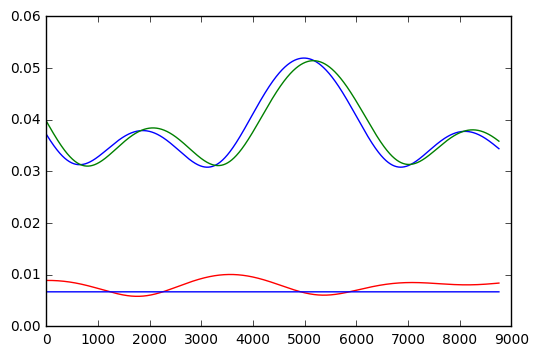

In [11]:
run(5847,2914)
plt.show()

In [13]:
banana = lambda pha: run(pha[0],pha[1])
guess = [4000,2000] #just some guess
scipy.optimize.fmin(banana, guess,xtol=0.25,ftol=0.25)

/home/elsy/workspace/PyLisa/env/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/elsy/workspace/PyLisa/env/lib/python3.5/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


4000 2000 20169.2701051
20169.2701051


In [9]:
fig = plt.figure()
ax = Axes3D(fig)


ax.plot(A1[:,0],A1[:,1],A1[:,2],  color="red")
ax.plot(A2[:,0],A2[:,1],A2[:,2], color="green")
ax.plot(A3[:,0],A3[:,1],A3[:,2],  color="blue")


# ax.plot([0],[0],[0],'y*');

ax.plot([0],[0],[0], marker='*', markersize=6, color="yellow")
    
    
plt.show()



NameError: name 'A1' is not defined